In [54]:
from pyspectra.readers.read_spc import read_spc
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.signal import find_peaks

x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)


C:\Users\user\AppData\Local\Temp\ipykernel_7072\2087047735.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7, 7))


x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)
x-y(1)


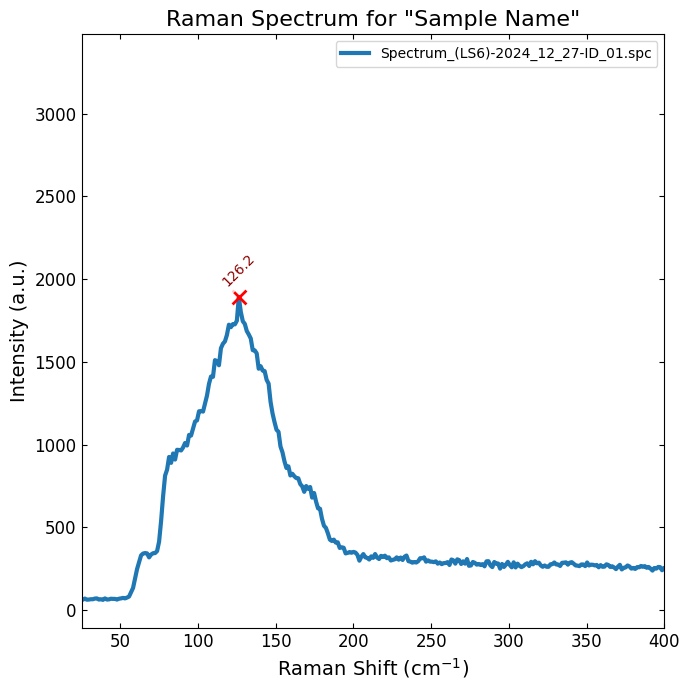

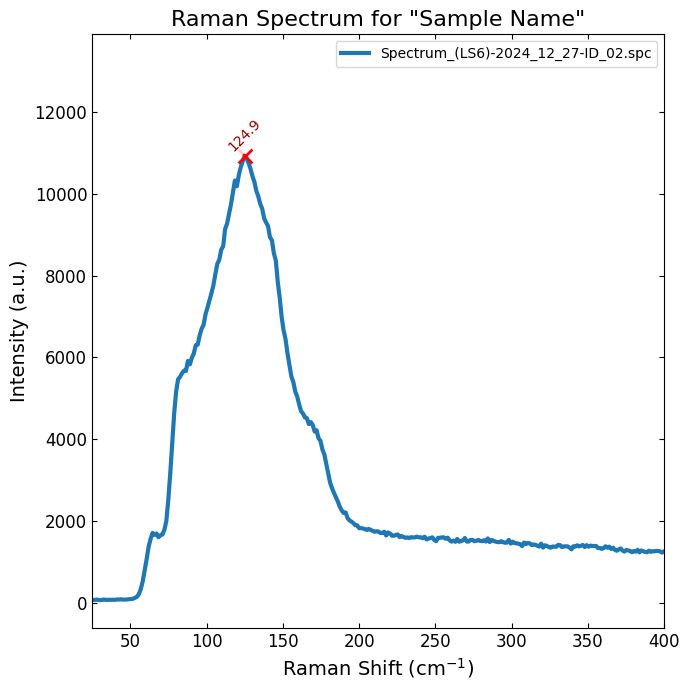

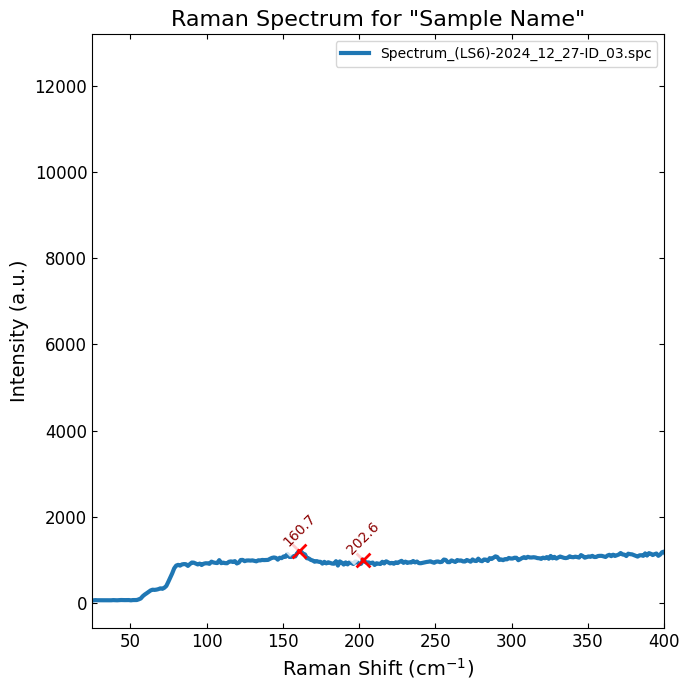

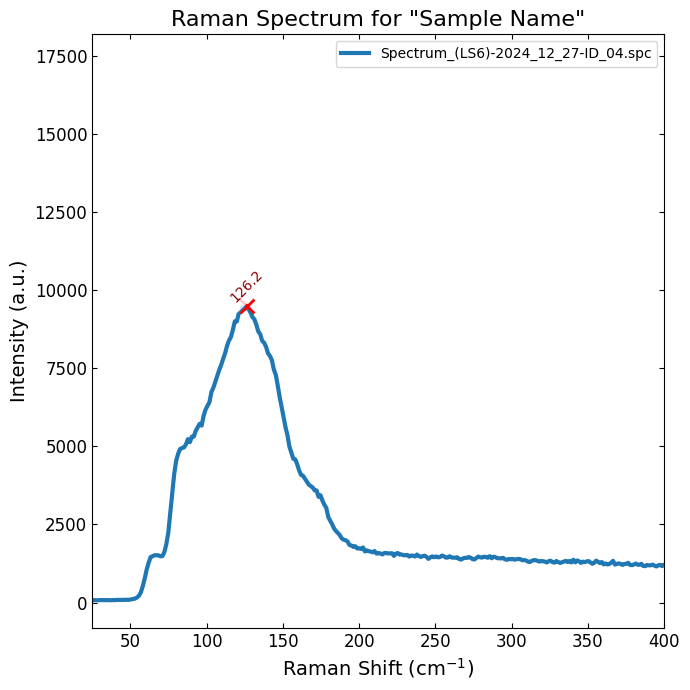

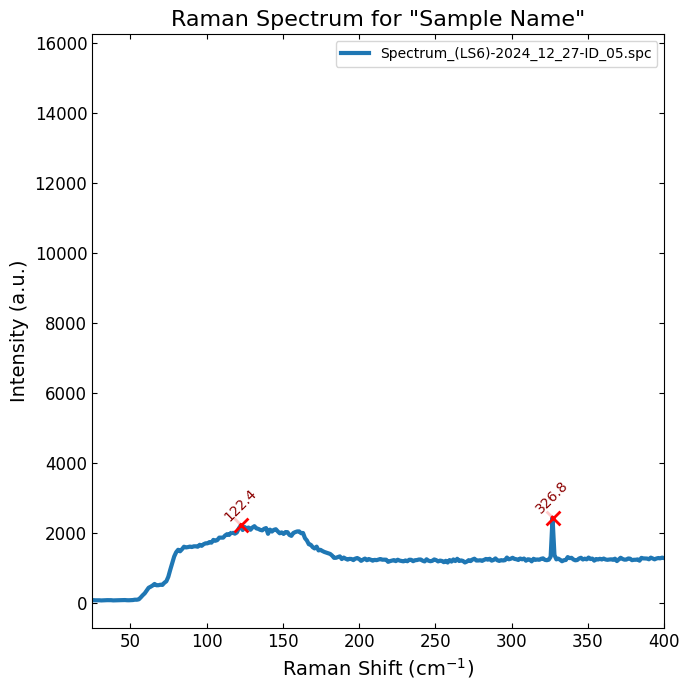

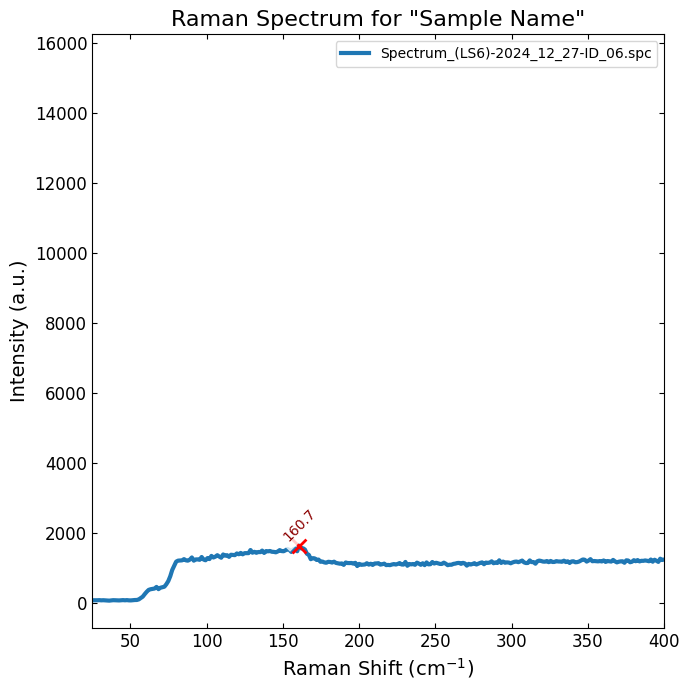

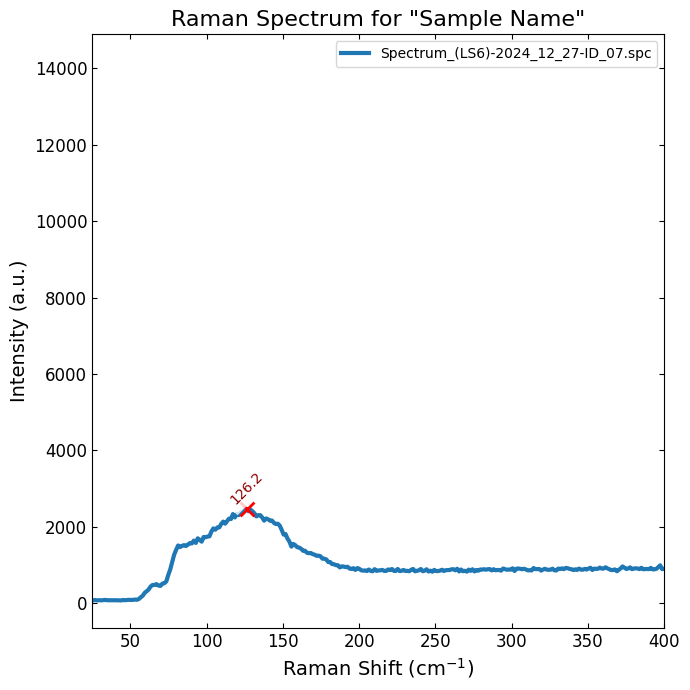

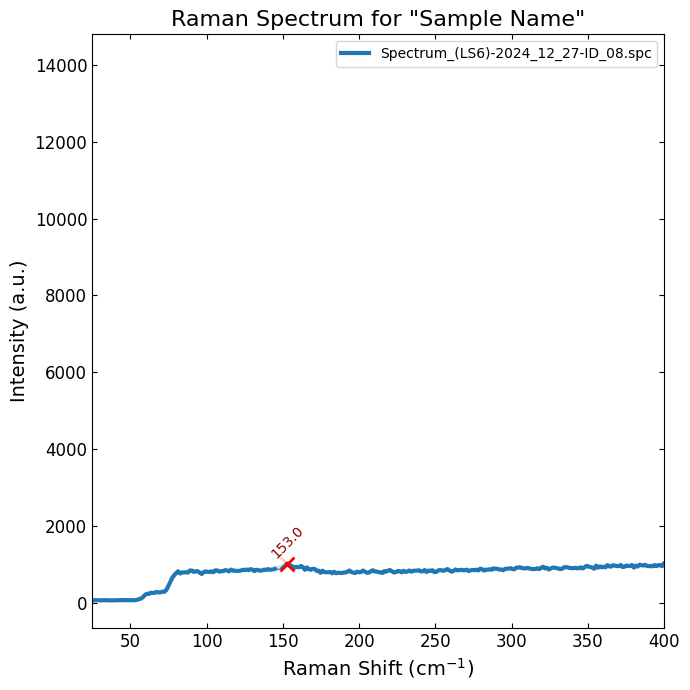

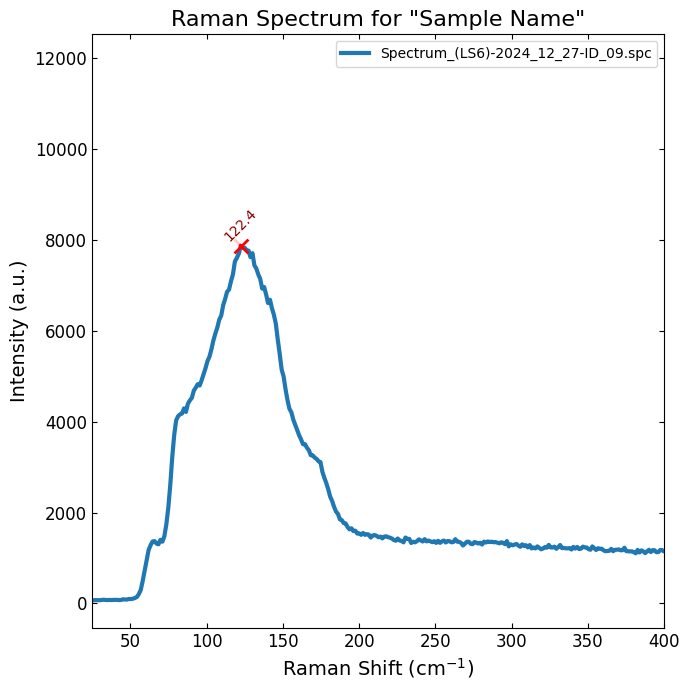

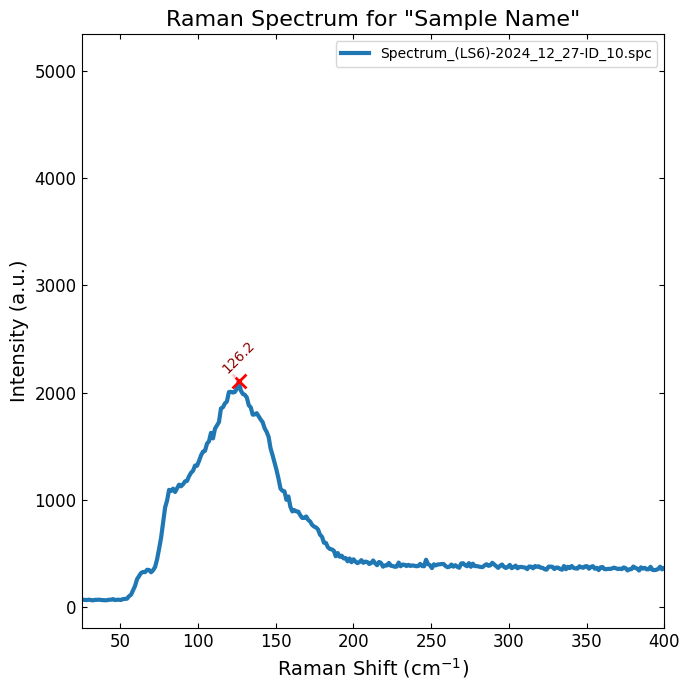

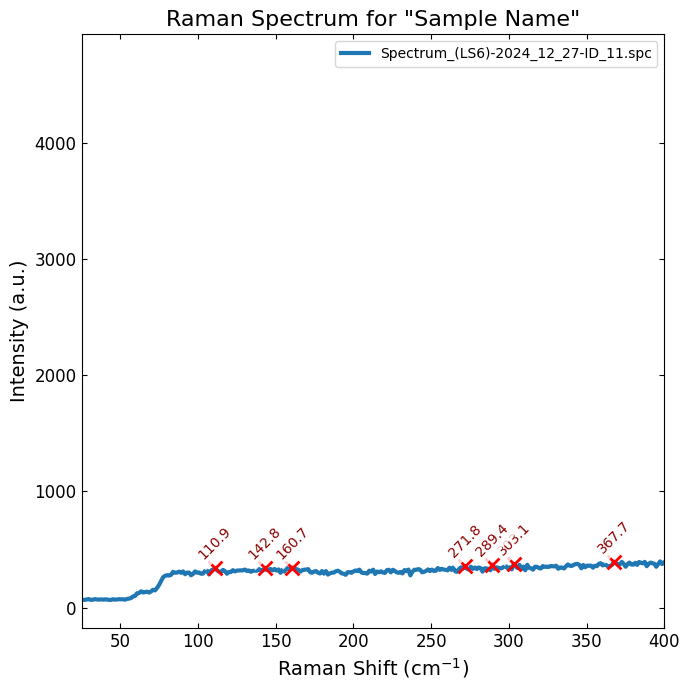

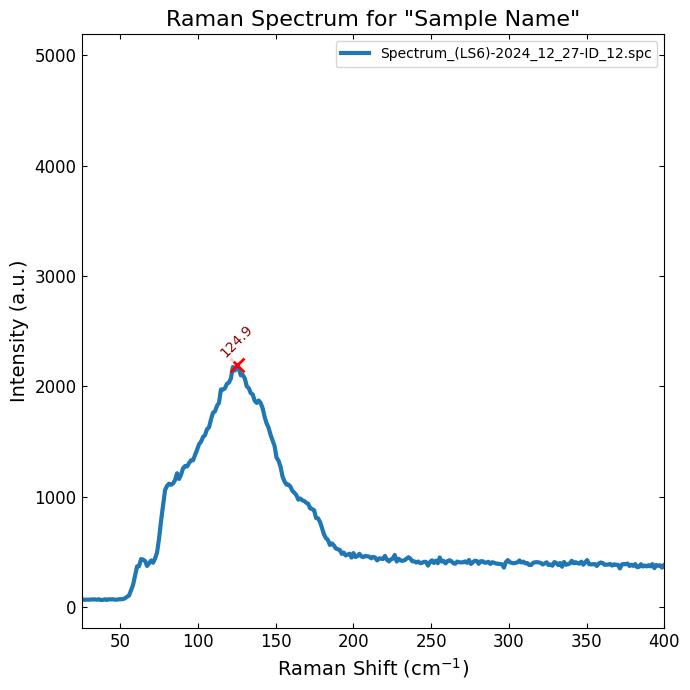

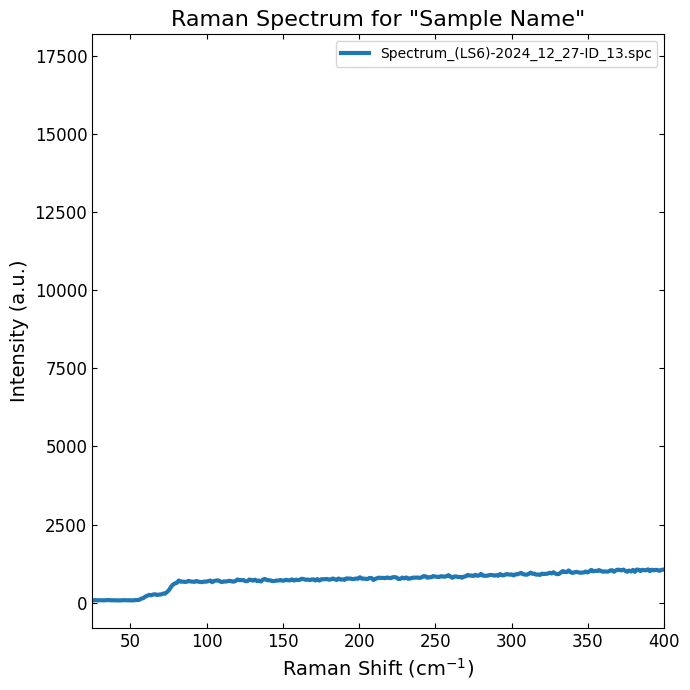

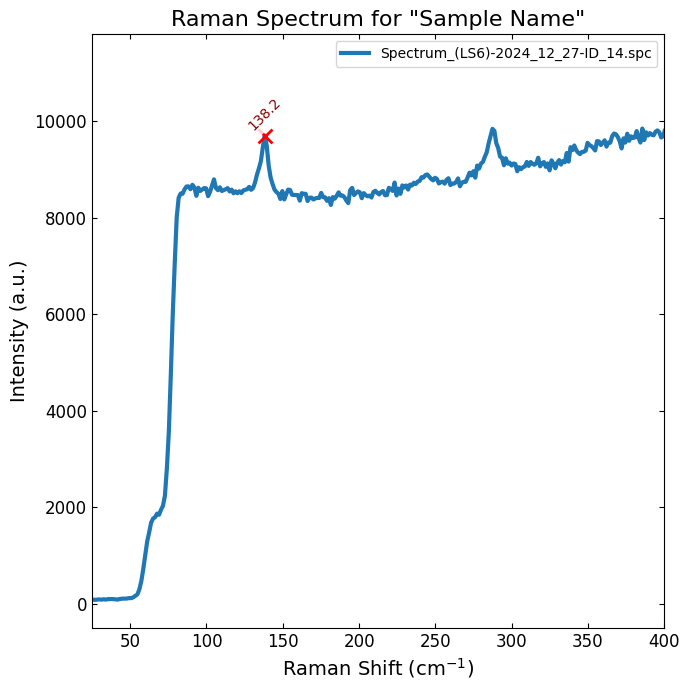

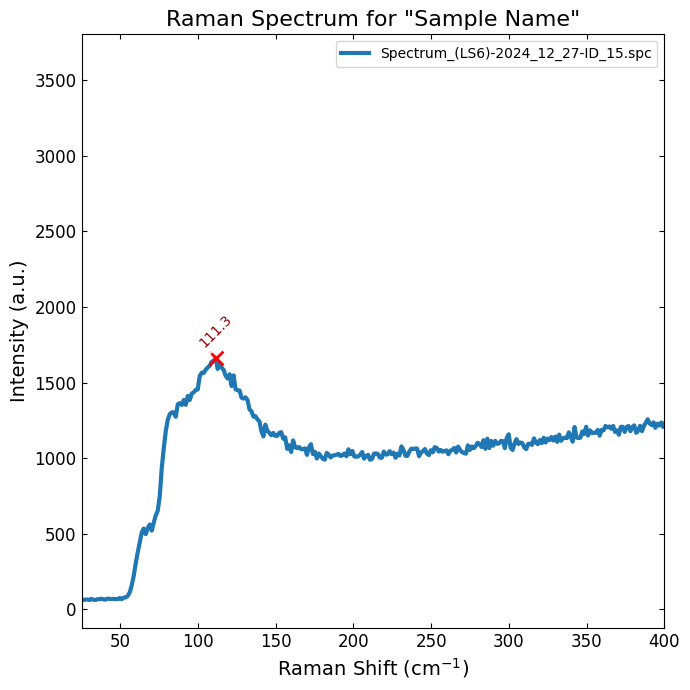

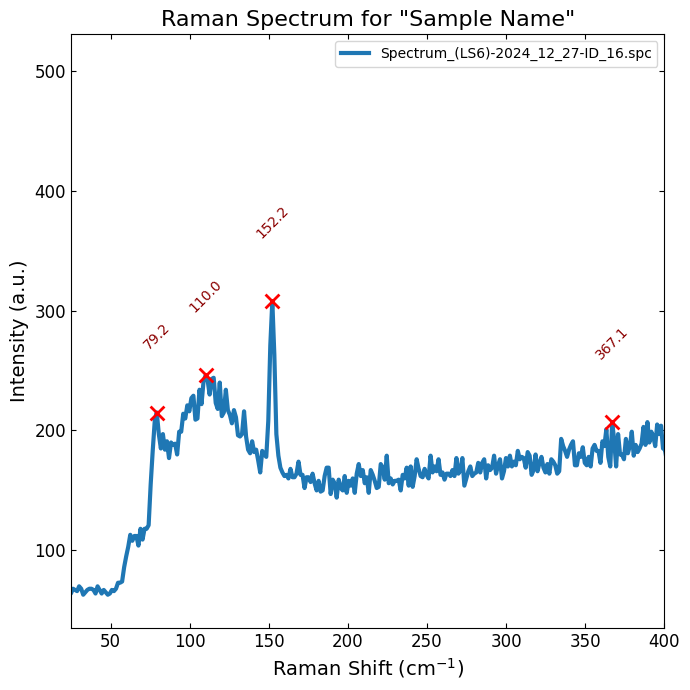

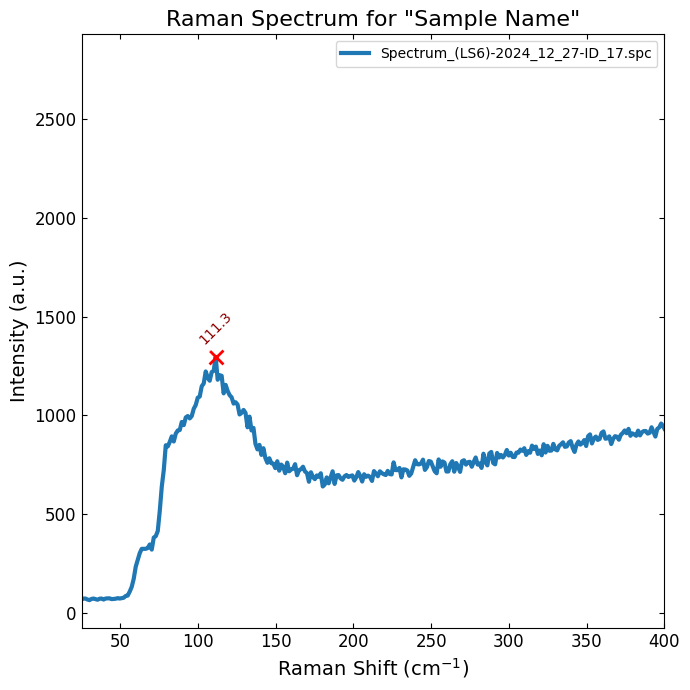

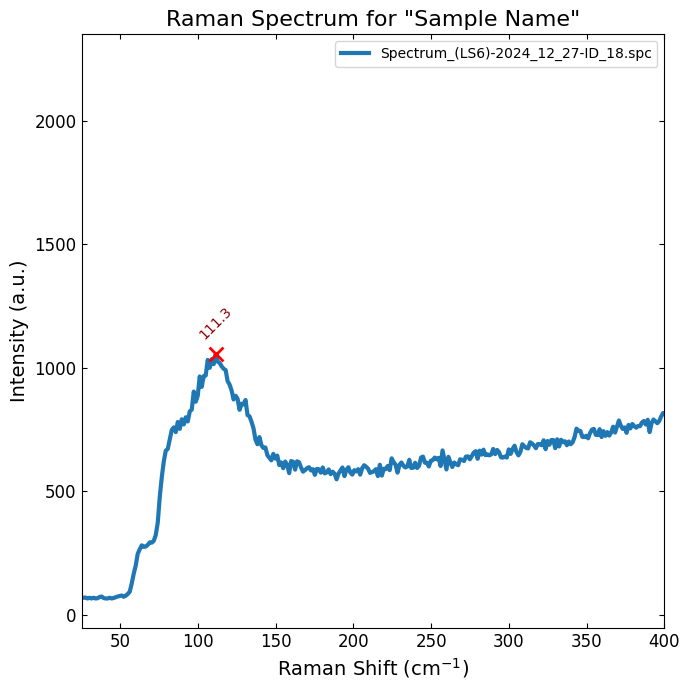

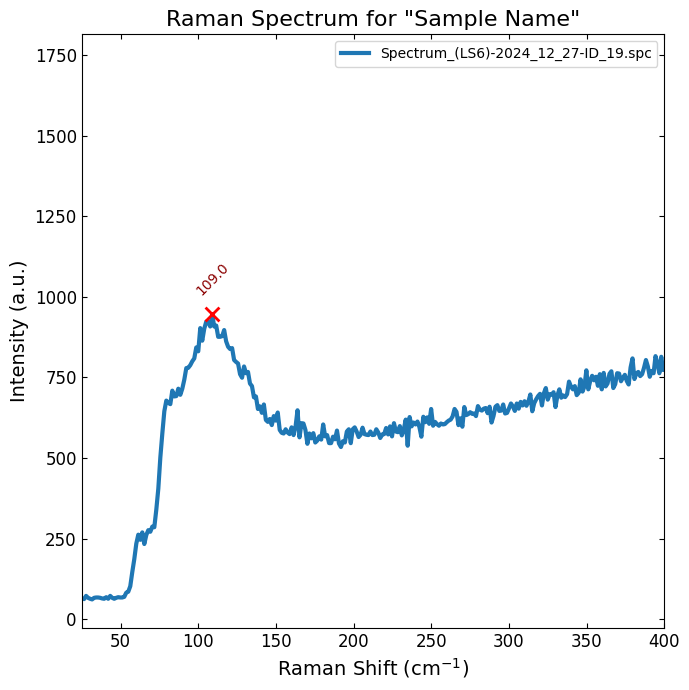

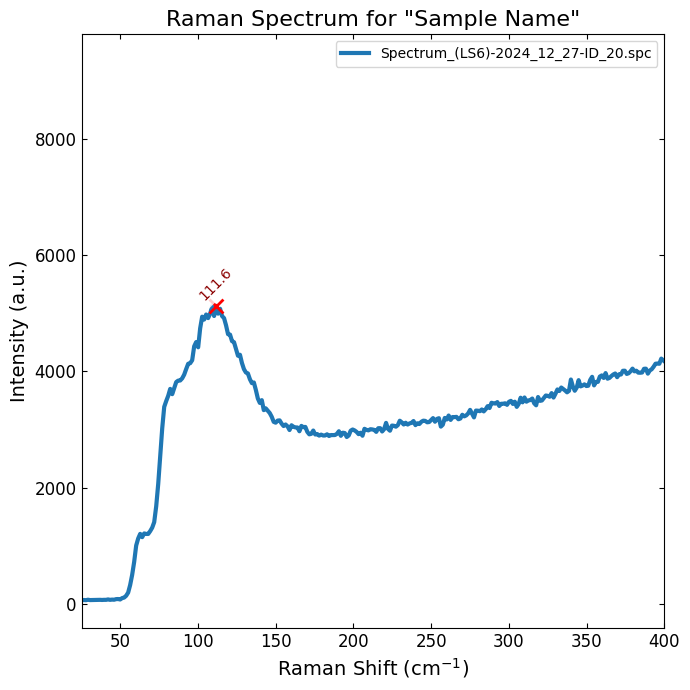

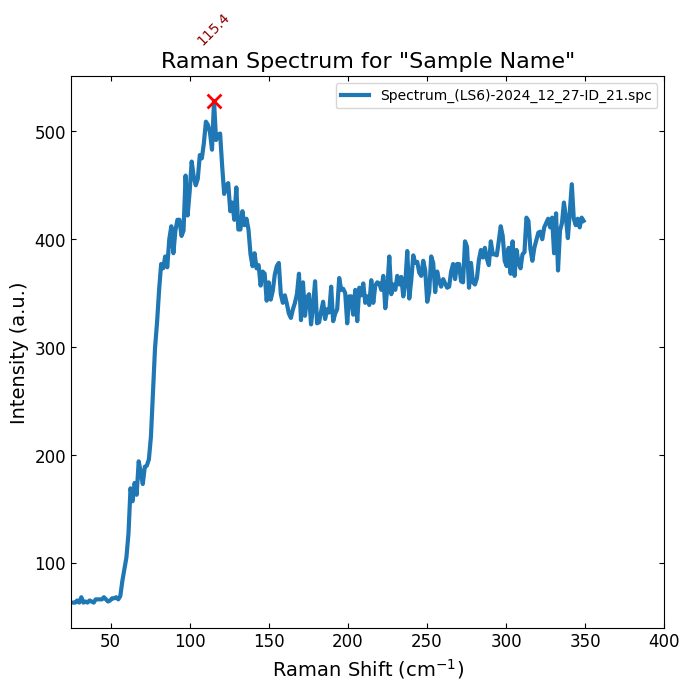

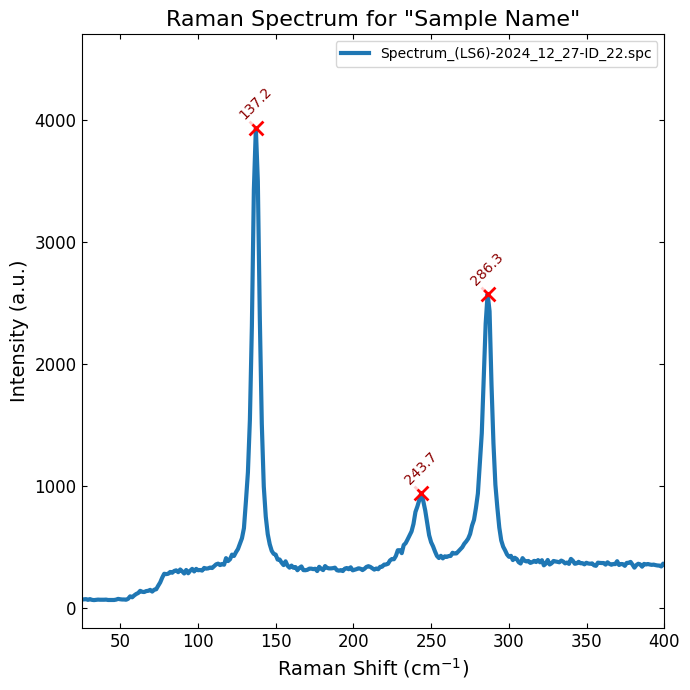

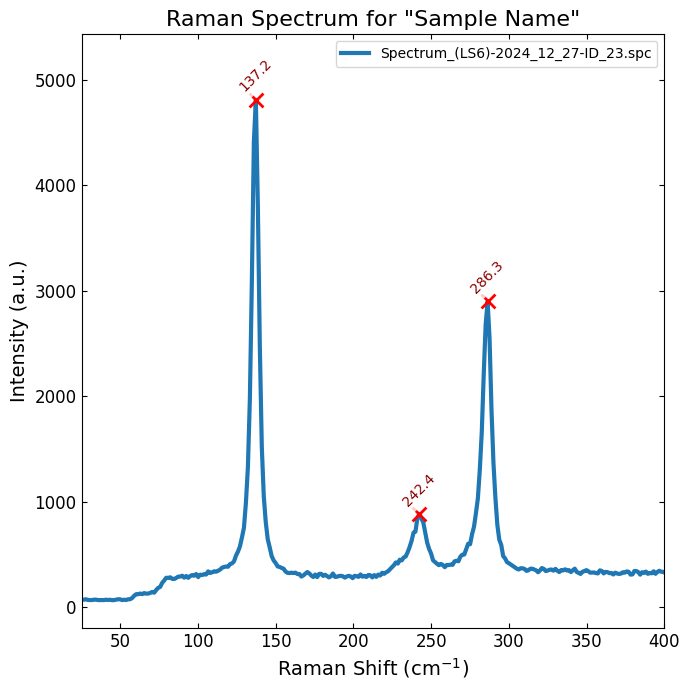

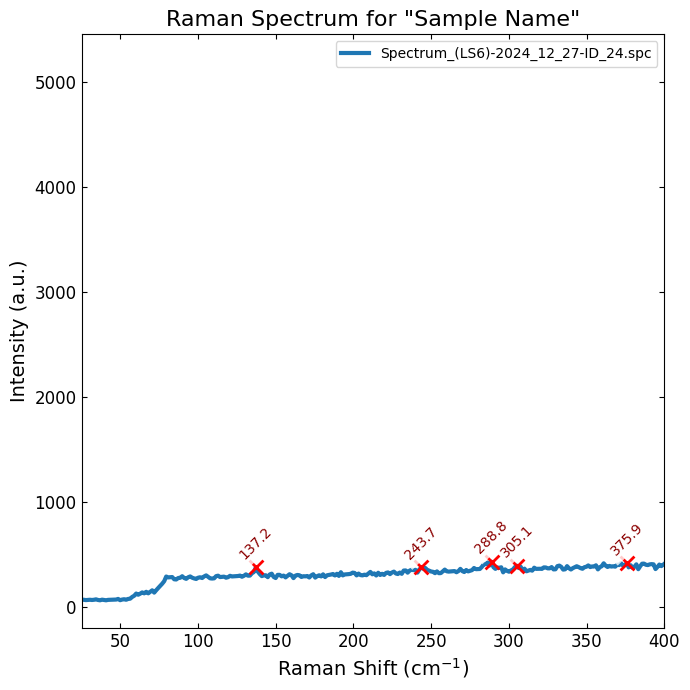

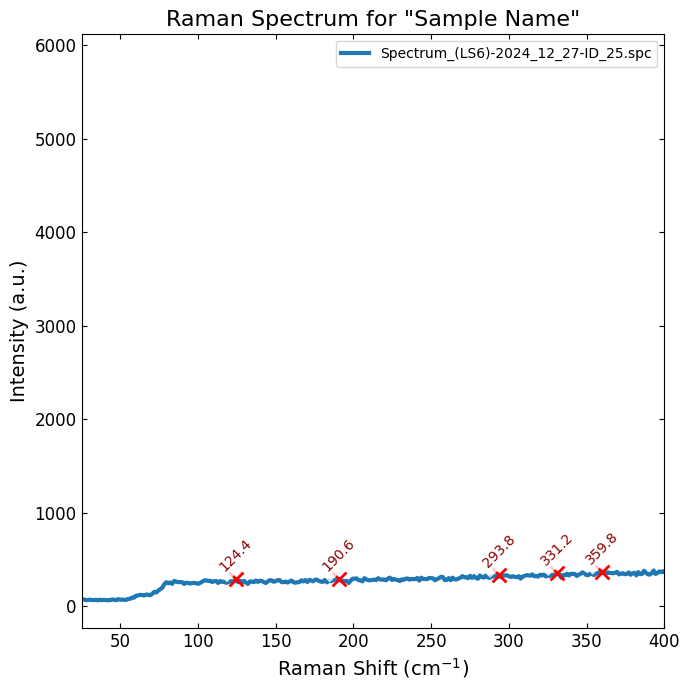

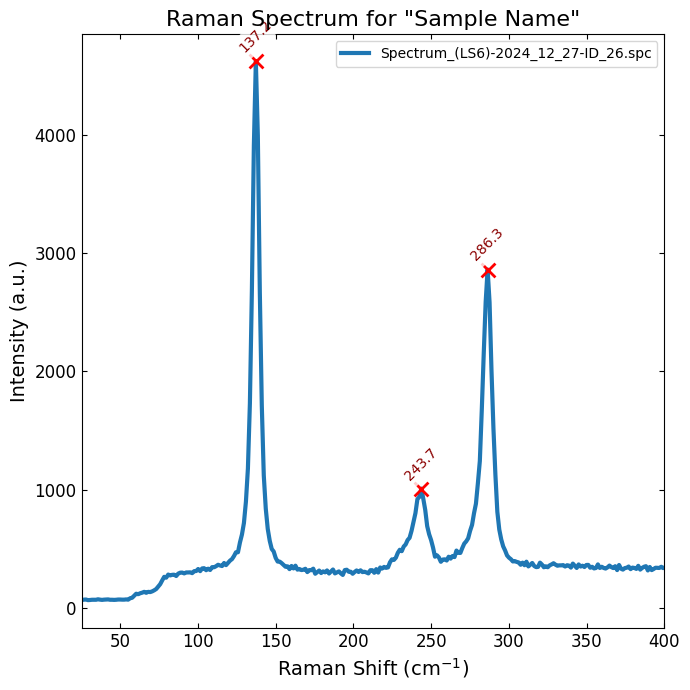

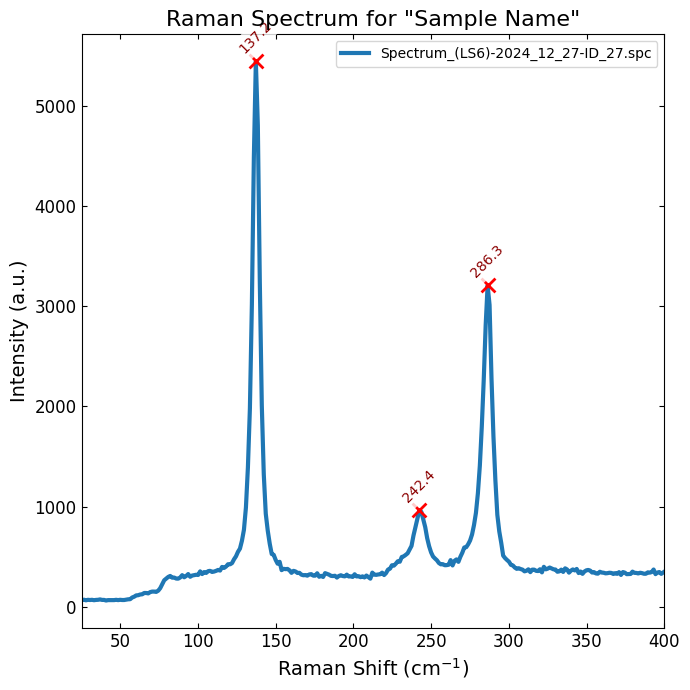

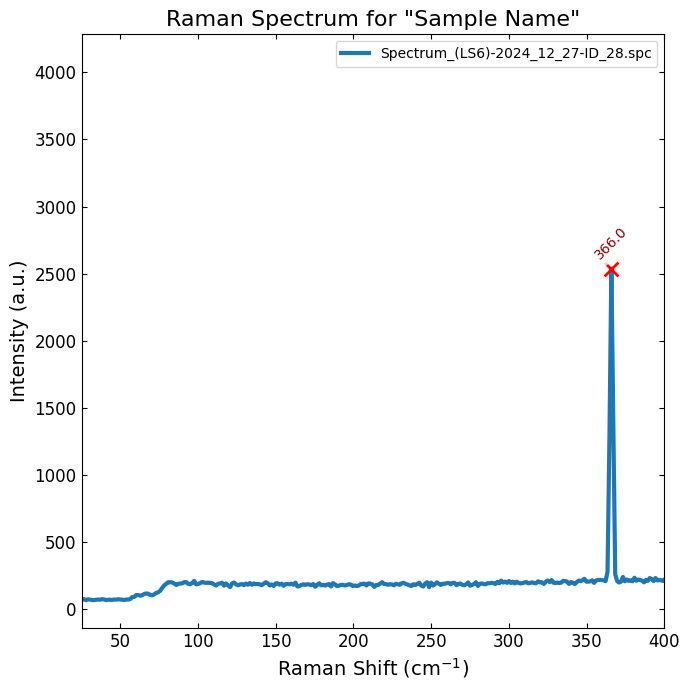

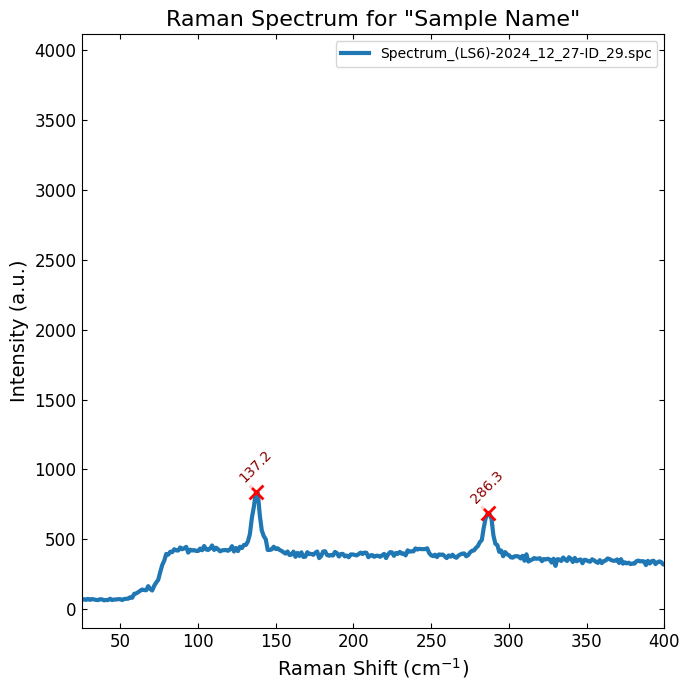

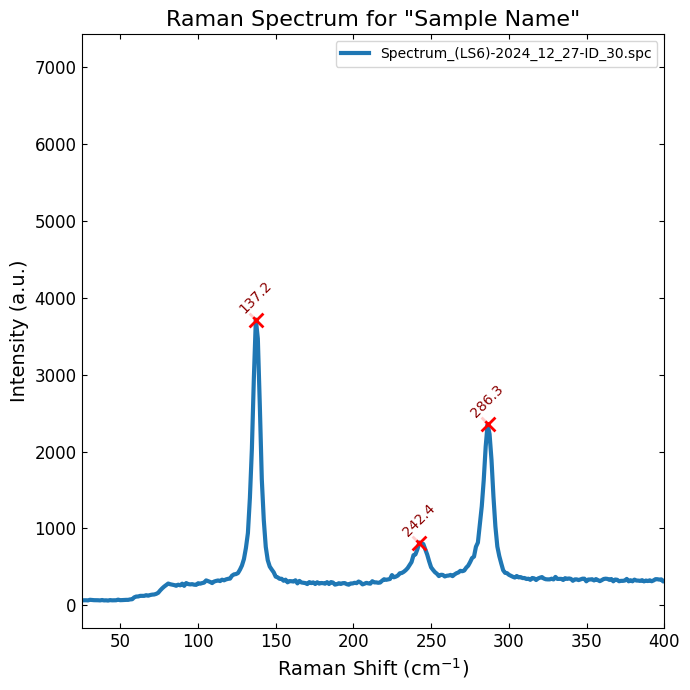

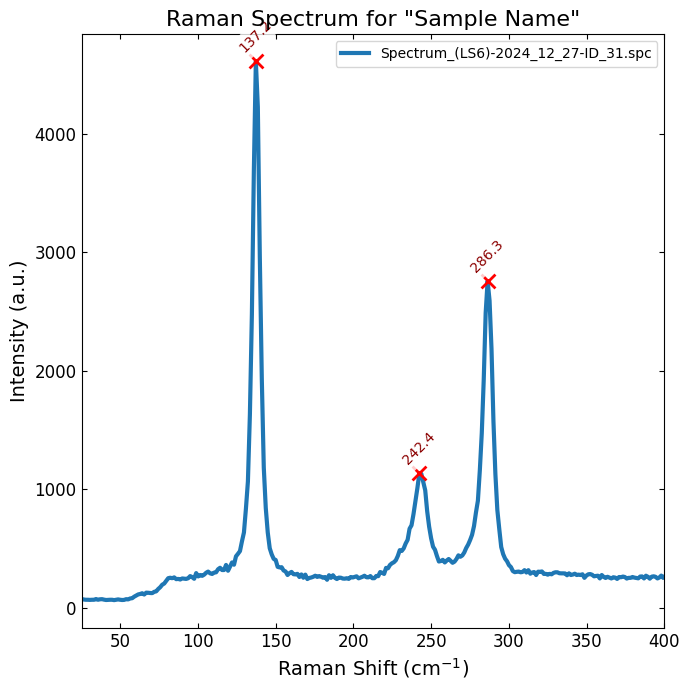

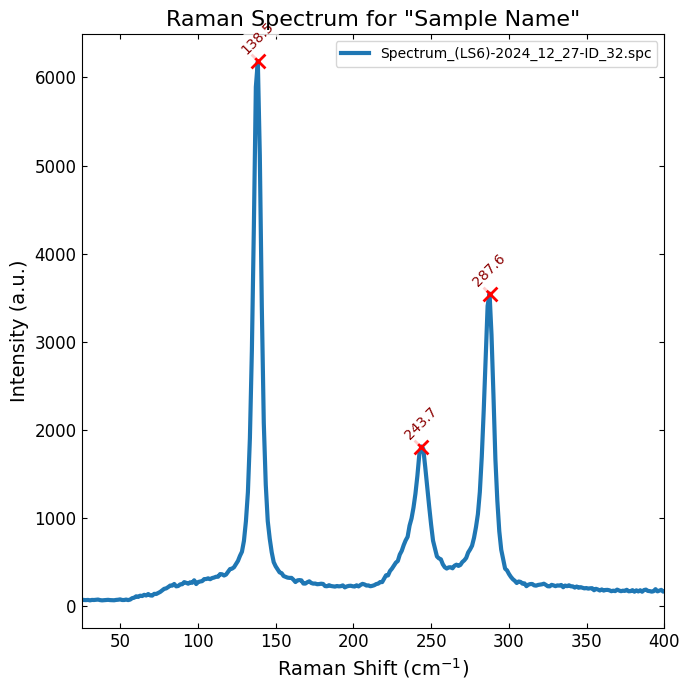

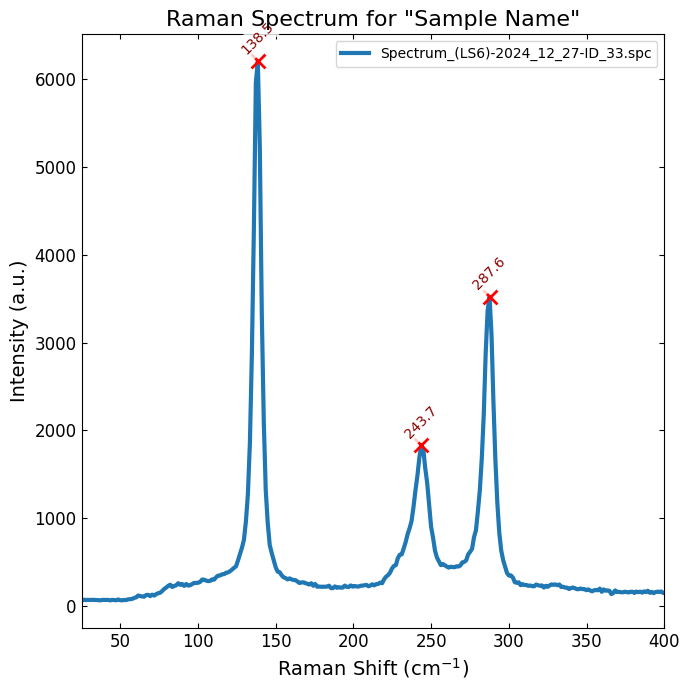

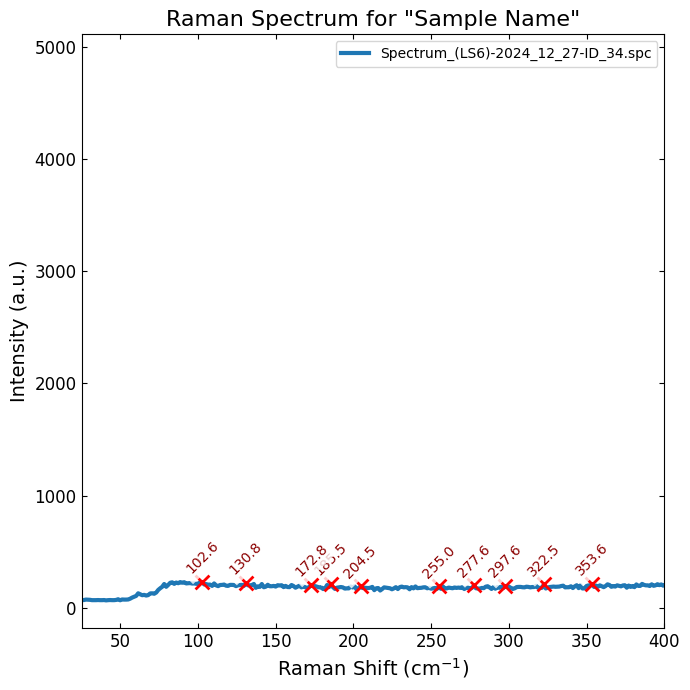

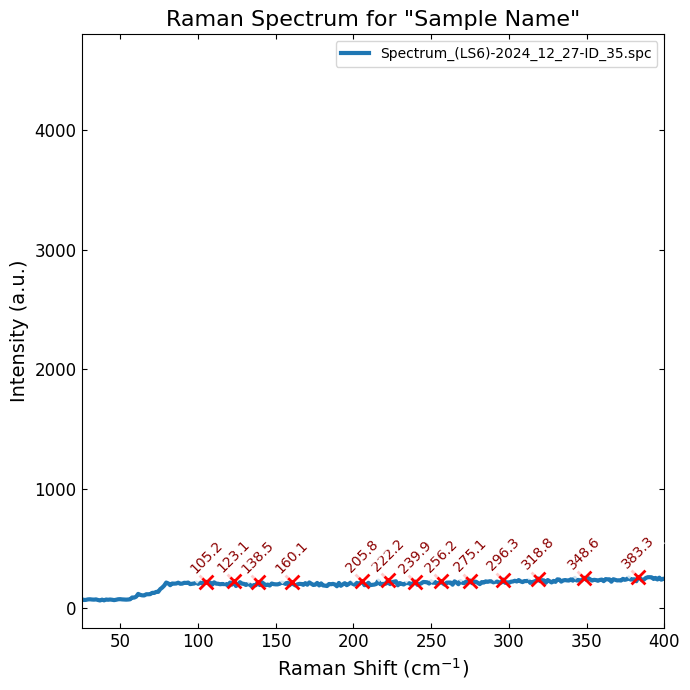

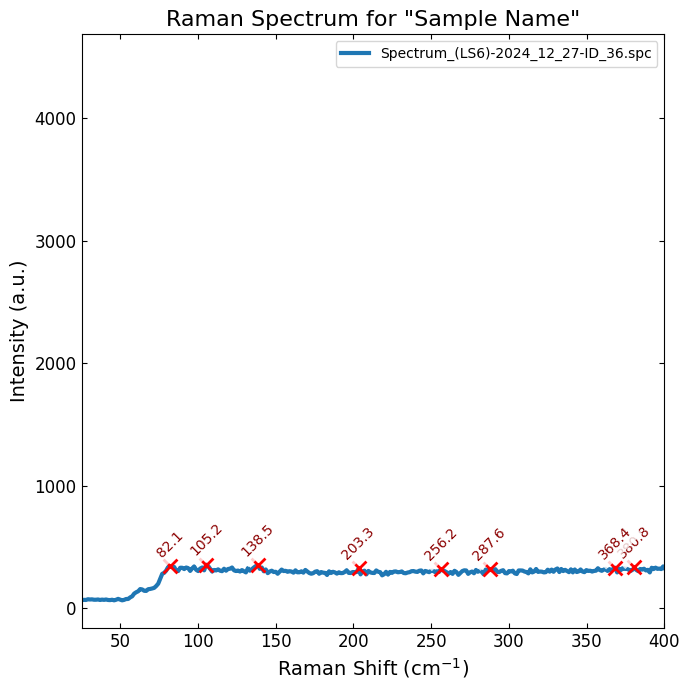

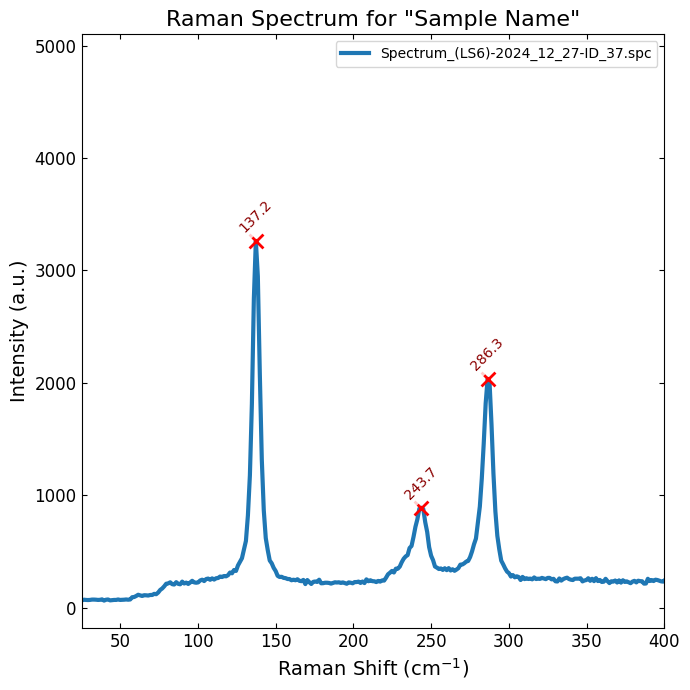

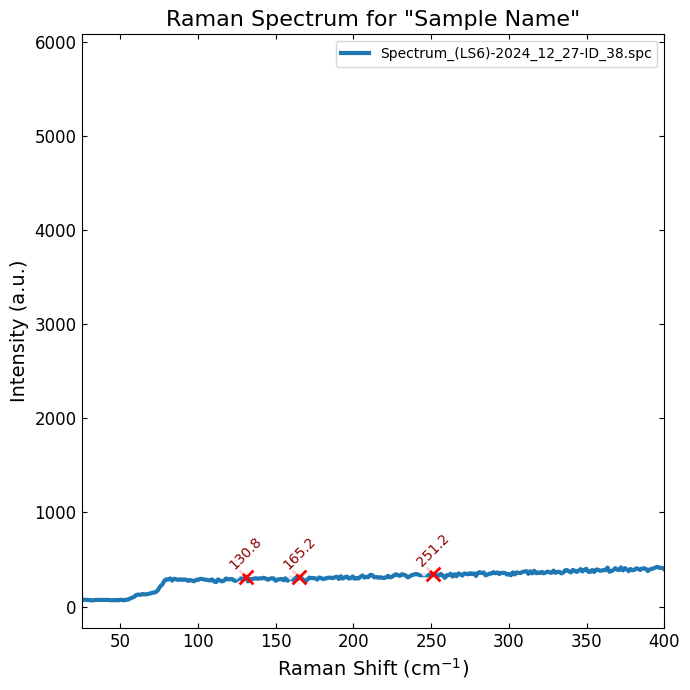

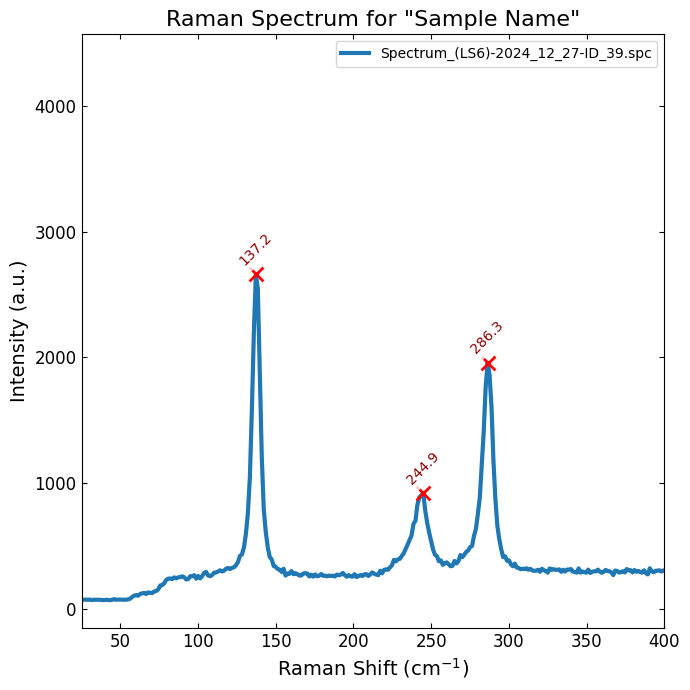

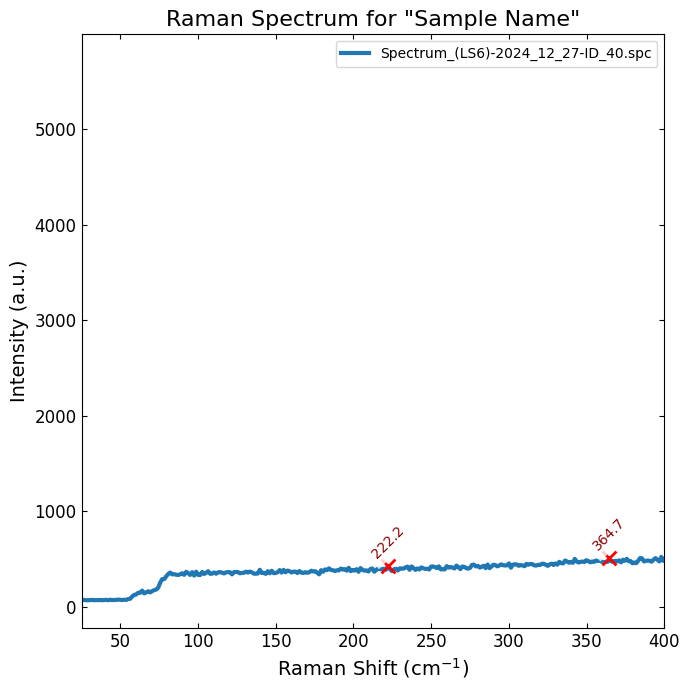

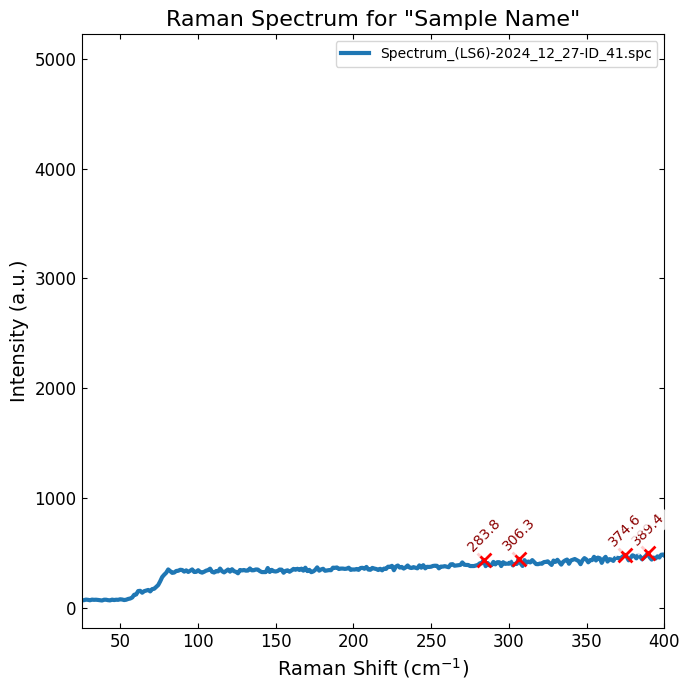

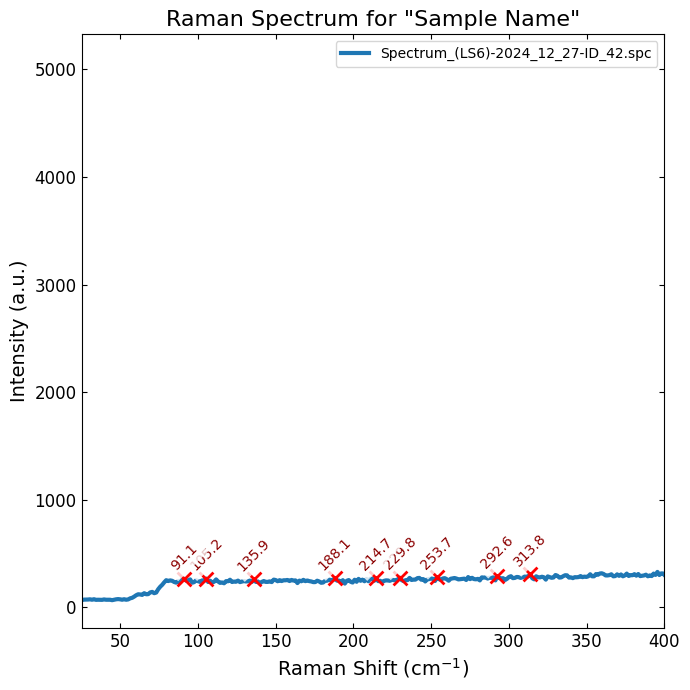

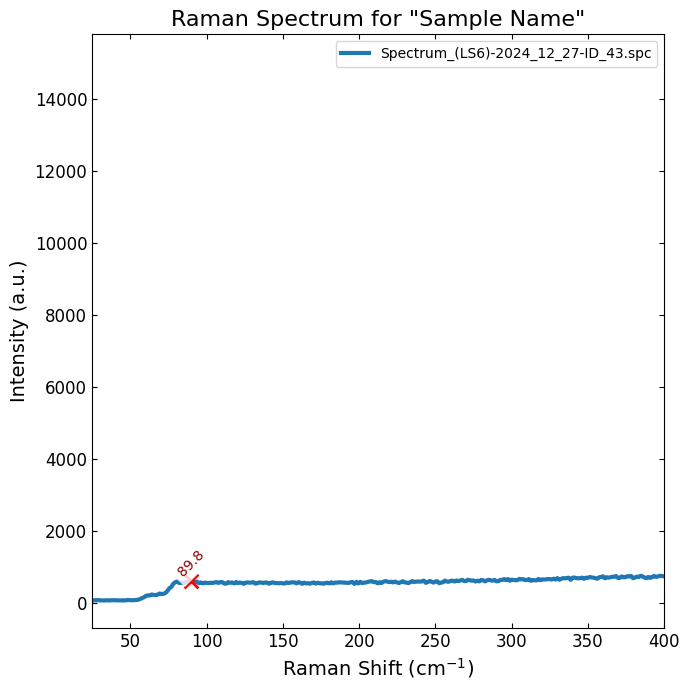

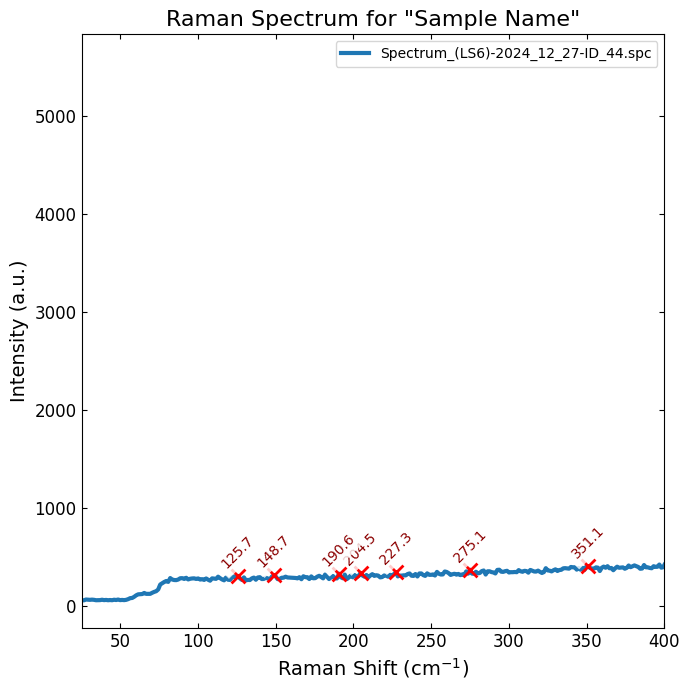

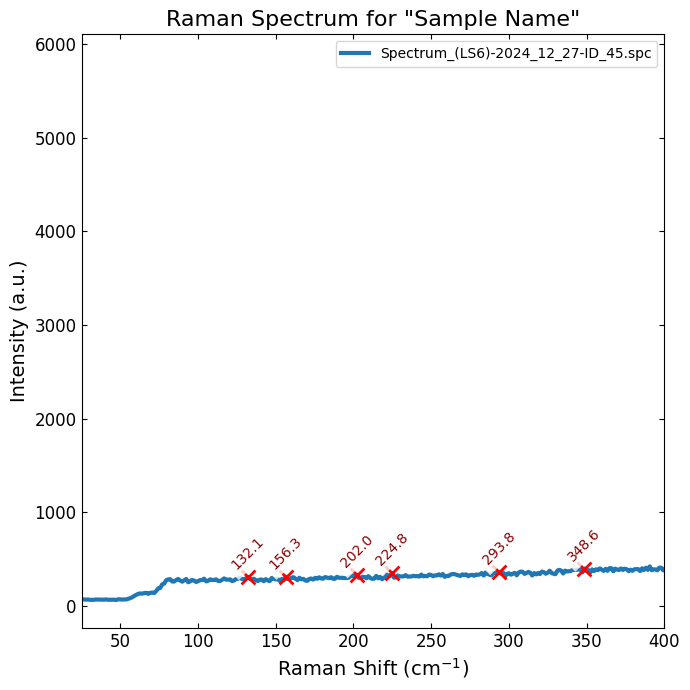

In [56]:
# Configure directory and parameters
directory = 'C:/Users/user/Desktop/Raw data/Raman/27.12.2024/2024_12_27 Ilin/'  # ← Change to your directory

def process_and_plot(filepath):
    """Process single SPC file and create annotated plot"""
    # Load data and extract filename
    spc = read_spc(filepath)
    filename = os.path.basename(filepath)
    
    # Extract and filter data
    x_raw = spc.index.to_numpy()
    y_raw = spc.to_numpy()
    mask = (x_raw >= 25) & (x_raw <= 400)
    x, y = x_raw[mask], y_raw[mask]
    
    peak_params = {
    'height': 100,   # Minimum peak height
    'prominence': np.max(y)/10,  # Minimum peak prominence
    'distance': 10    # Minimum distance between peaks
    }

    # Detect peaks
    peaks, _ = find_peaks(y, **peak_params)
    peak_positions = x[peaks]
    
    # Create figure with proper tick directions
    plt.figure(figsize=(7, 7))
    ax = spc.plot(linewidth=3, label=filename)
    
    # Configure axes
    plt.xlim(25, 400)
    plt.xlabel('Raman Shift (cm$^{-1}$)', fontsize=14)
    plt.ylabel('Intensity (a.u.)', fontsize=14)
    plt.title('Raman Spectrum for "Sample Name"', fontsize=16)
    
    # Set ticks on all sides pointing inward
    ax.tick_params(axis='both', which='major', direction='in',
                   top=True, right=True, labelsize=12)
    
    # Annotate peaks
    for peak_x, peak_y in zip(peak_positions, y[peaks]):
        ax.scatter(peak_x, peak_y, color='red', marker='x', 
                  s=100, linewidth=2, zorder=3)
        ax.text(peak_x, peak_y+50, f'{peak_x:.1f}',  # Offset text vertically
               ha='center', va='bottom', fontsize=10,
               color='darkred', rotation=45,
               bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    plt.legend()
    plt.tight_layout()
    plt.savefig('C:/Users/user/Desktop/Pictures/27.12.2024 Raman/' + filename + '.png', dpi=300)


# Process all SPC files in directory
for fname in os.listdir(directory):
    if fname.endswith('.spc'):
        full_path = os.path.join(directory, fname)
        process_and_plot(full_path)


